In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

First we import all the basic important libraries for our project

In [3]:
data = pd.read_csv(r'D:\Python\Assignment\Sample_for_AI (1) (1).csv')
data.head()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,NaN,API
1,2,No,No,No,5.0,674,2.5,NaN,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission


Now we check all thr primary data cleaning process like null values, datatypes, statsical description of data etc.

In [4]:
data.columns

Index(['ID', 'Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9240 non-null   int64  
 1   Purchased                    9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Do Not Call                  9240 non-null   object 
 4   TotalVisits                  9103 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9103 non-null   float64
 7   Specialization               5860 non-null   object 
 8   Origin                       9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [6]:
data.isna().sum()

ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

In [7]:
data.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,4620.500000,3.445238,487.698268,2.362820
std,2667.502577,4.854853,548.021466,2.161418
min,1.000000,0.000000,0.000000,0.000000
25%,2310.750000,1.000000,12.000000,1.000000
50%,4620.500000,3.000000,248.000000,2.000000
75%,6930.250000,5.000000,936.000000,3.000000
max,9240.000000,251.000000,2272.000000,55.000000


In [8]:
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)
data['TotalVisits'].isna().sum()

0

In [9]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)
data['Page Views Per Visit'].isna().sum()

0

In [10]:
data.isna().sum()

ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                       0
Total Time Spent on Website       0
Page Views Per Visit              0
Specialization                 3380
Origin                            0
dtype: int64

In [11]:
data.shape

(9240, 9)

In [12]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Here we are imputing null values in the Specialization column based on random imputation

In [13]:
import random
random_list = ['Finance Management','Human Resource Management', 'Marketing Management', 'Operations Management',
             'Business Administration', 'IT Projects Management', 'Supply Chain Management']

for i in data.Specialization.isna() == True:
    data.fillna(random.choice(random_list), inplace=True)

In [14]:
data.isna().sum()

ID                             0
Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

Now we can see, we have handles all the missing values in our dataset now we are good to go for further cleaning process

In [15]:
data.shape

(9240, 9)

In [16]:
data['Specialization'].value_counts()

Marketing Management                 4218
Finance Management                    976
Human Resource Management             848
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

# ***Data Visualization***

In [19]:
data['Purchased'].value_counts(normalize=True)

No     0.61461
Yes    0.38539
Name: Purchased, dtype: float64

<AxesSubplot: >

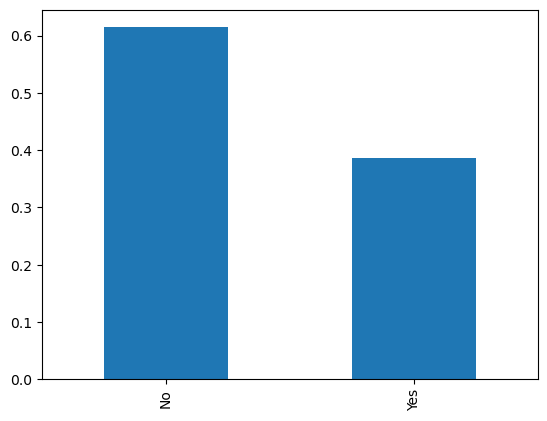

In [17]:
data['Purchased'].value_counts(normalize=True).plot.bar()

<AxesSubplot: >

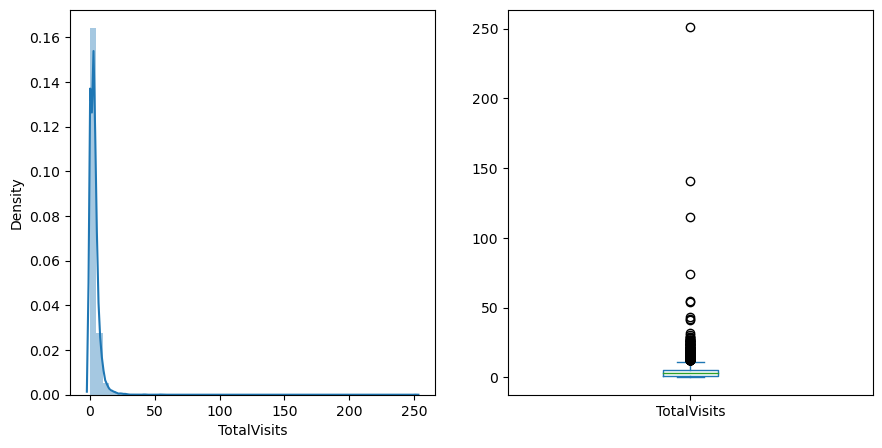

In [18]:
plt.subplot(1,3,1)
sns.distplot(data['TotalVisits'], kde=True)
plt.subplot(1,3,2)
data['TotalVisits'].plot.box(figsize = (16,5))

<AxesSubplot: >

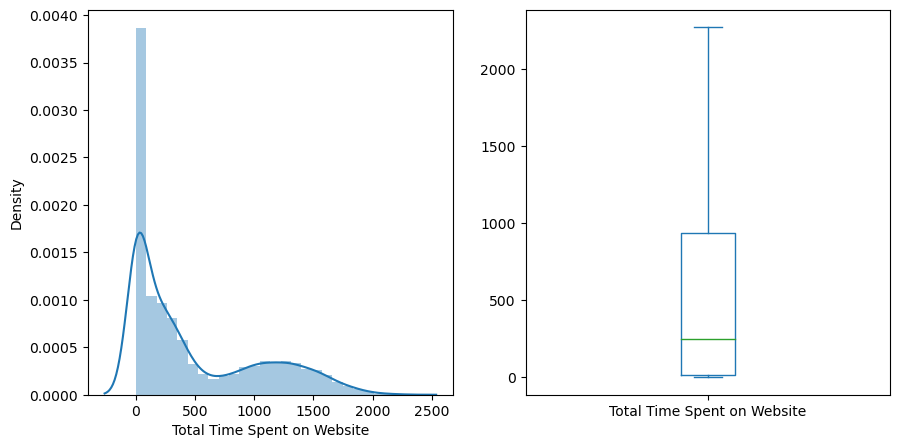

In [19]:
plt.subplot(1,3,1)
sns.distplot(data['Total Time Spent on Website'], kde=True)
plt.subplot(1,3,2)
data['Total Time Spent on Website'].plot.box(figsize = (16,5))

<AxesSubplot: >

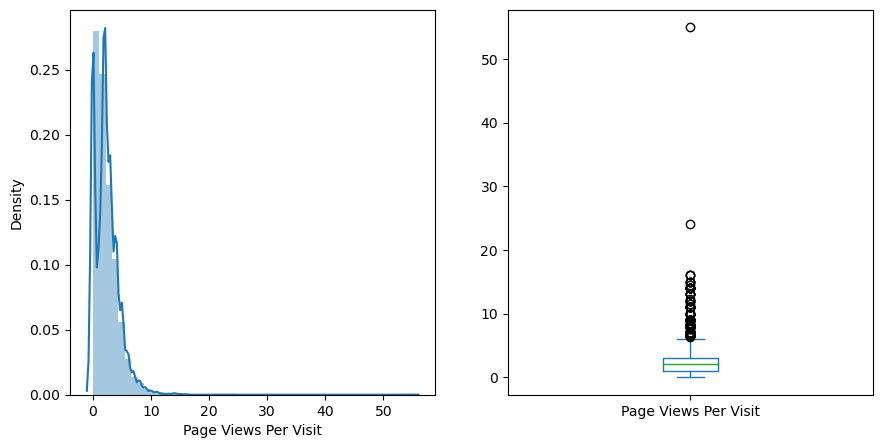

In [20]:
plt.subplot(1,3,1)
sns.distplot(data['Page Views Per Visit'], kde=True)
plt.subplot(1,3,2)
data['Page Views Per Visit'].plot.box(figsize = (16,5))

As we can see the data is not normally distributed, the graphs shows that the data is right skewed, so we have to handle this outliers for data modelling.

So we are using inter quartile range method for handling outliers.

In [21]:
Q1 = np.percentile(data['TotalVisits'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['TotalVisits'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['TotalVisits'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['TotalVisits'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

1.0
5.0
4.0
Old Shape:  (9240, 9)
New Shape:  (8887, 9)


<AxesSubplot: >

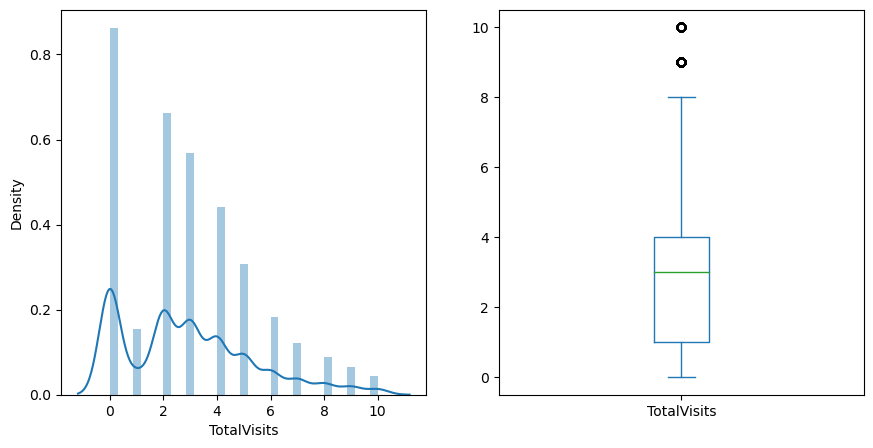

In [22]:
plt.subplot(1,3,1)
sns.distplot(data['TotalVisits'], kde=True)
plt.subplot(1,3,2)
data['TotalVisits'].plot.box(figsize = (16,5))

In [23]:
Q1 = np.percentile(data['Total Time Spent on Website'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Total Time Spent on Website'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['Total Time Spent on Website'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Total Time Spent on Website'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)


3.5
914.0
910.5
Old Shape:  (8887, 9)
New Shape:  (8887, 9)


<AxesSubplot: >

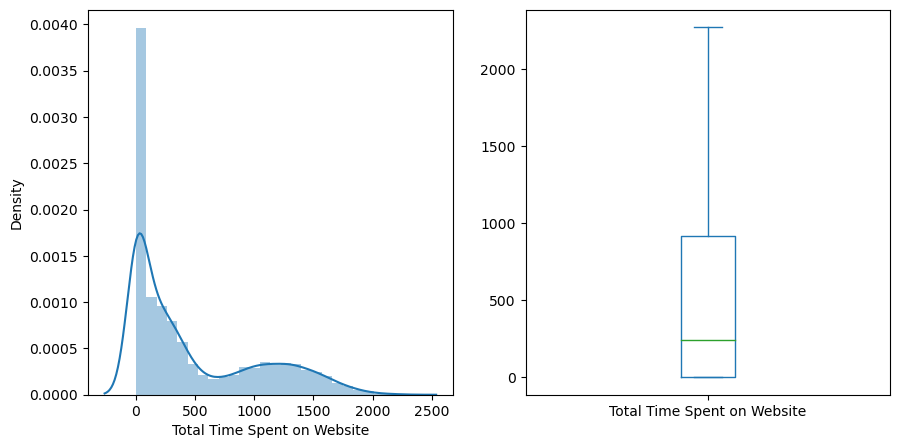

In [24]:
plt.subplot(1,3,1)
sns.distplot(data['Total Time Spent on Website'], kde=True)
plt.subplot(1,3,2)
data['Total Time Spent on Website'].plot.box(figsize = (16,5))

<AxesSubplot: >

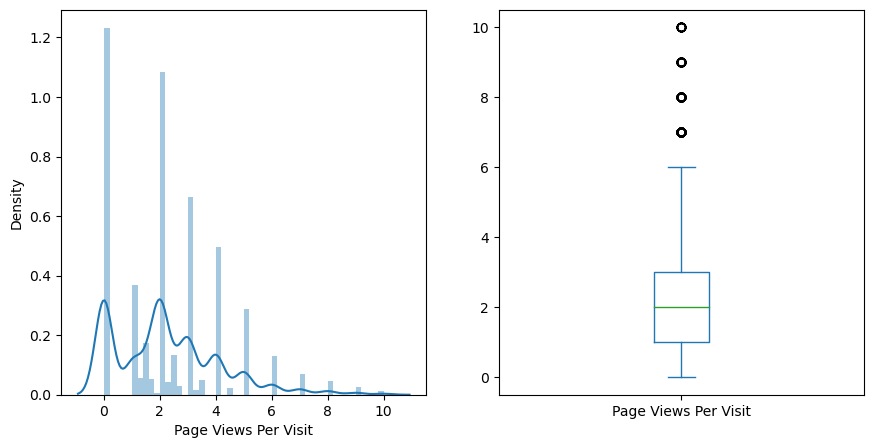

In [25]:
plt.subplot(1,3,1)
sns.distplot(data['Page Views Per Visit'], kde=True)
plt.subplot(1,3,2)
data['Page Views Per Visit'].plot.box(figsize = (16,5))

<AxesSubplot: >

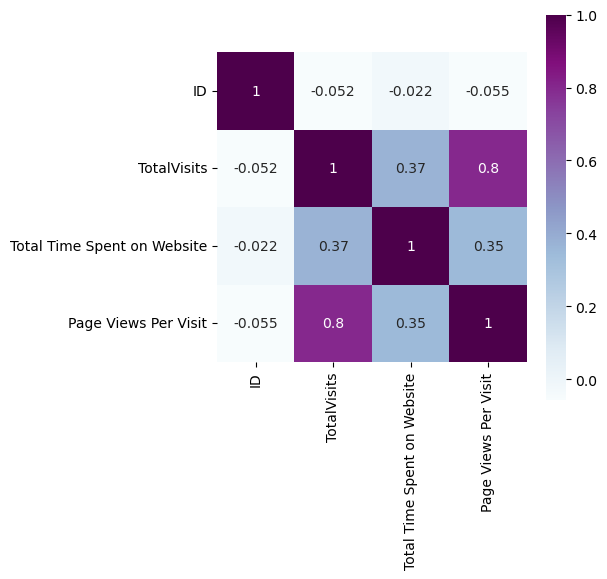

In [29]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(), square = True, annot = True, cmap = 'BuPu' )

From above heatmap we can interpret that the two columns "Total Visit" and "Page views per visit" are almost perfectly correlated to each other

In [26]:
data.head()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,Marketing Management,API
1,2,No,No,No,5.0,674,2.5,Marketing Management,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,Marketing Management,Landing Page Submission


In [27]:
data['Origin'].value_counts()

Landing Page Submission    4629
API                        3488
Lead Add Form               714
Lead Import                  55
Quick Add Form                1
Name: Origin, dtype: int64

<AxesSubplot: title={'center': 'Origin'}>

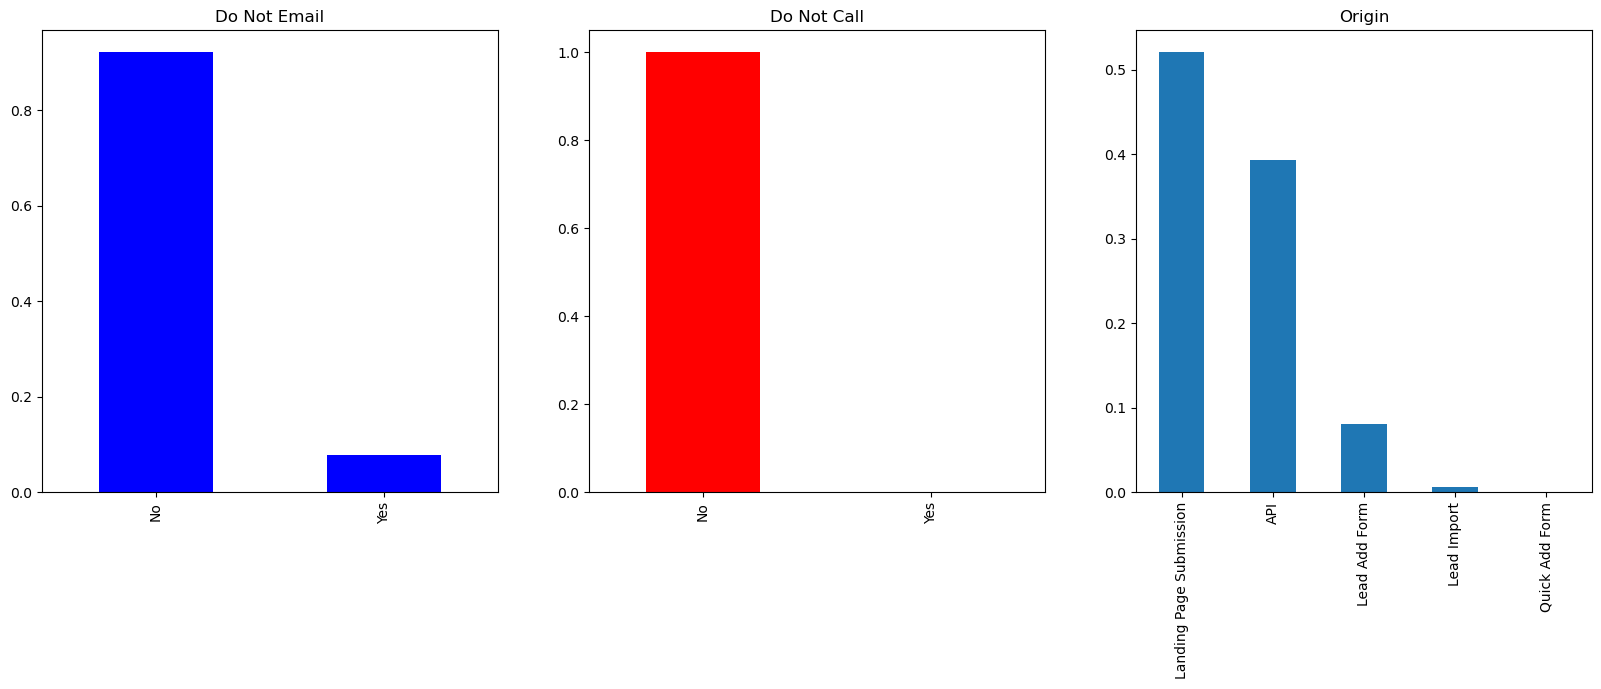

In [28]:
plt.subplot(1,3,1)
data['Do Not Email'].value_counts(normalize = True).plot.bar(figsize = (20,6), title = 'Do Not Email', color = 'Blue')
plt.subplot(1,3,2)
data['Do Not Call'].value_counts(normalize = True).plot.bar(figsize = (20,6), title = 'Do Not Call', color = 'Red')
plt.subplot(1,3,3)
data['Origin'].value_counts(normalize = True).plot.bar(figsize = (20,6), title = 'Origin')

<AxesSubplot: xlabel='Origin', ylabel='count'>

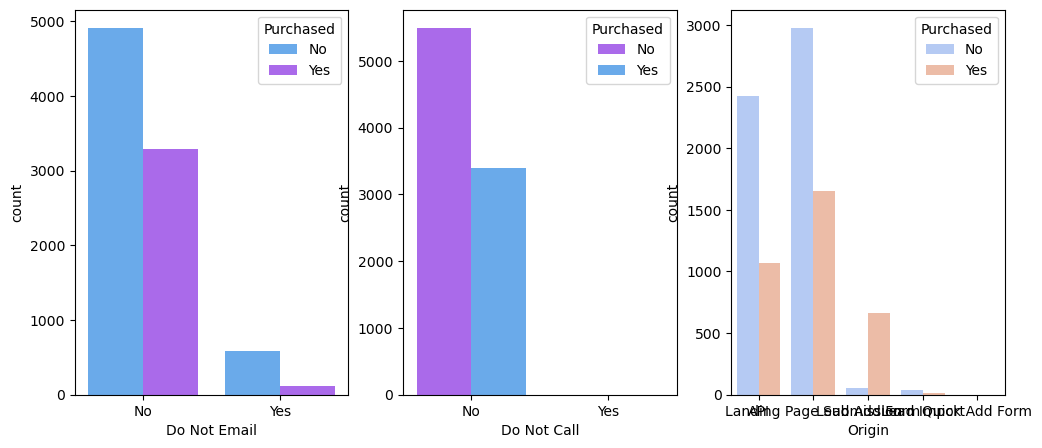

In [29]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.countplot(x = 'Do Not Email', hue = 'Purchased', data = data, palette = 'cool')
plt.subplot(1,3,2)
sns.countplot(x = 'Do Not Call', hue = 'Purchased', data = data, palette = 'cool_r')
plt.subplot(1,3,3)
sns.countplot(x = 'Origin', hue = 'Purchased', data = data, palette = 'coolwarm')
#plt.subplot(2,3,4)
#sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = train, palette = 'coolwarm_r')
#plt.subplot(2,3,5)
#sns.countplot(x = 'Education', hue = 'Loan_Status', data = train, palette = 'copper')

In [30]:
do_not_email = pd.crosstab(data['Do Not Email'], data['Purchased'])
do_not_call = pd.crosstab(data['Do Not Call'], data['Purchased'])
origin = pd.crosstab(data['Origin'], data['Purchased'])

<AxesSubplot: xlabel='Do Not Email'>

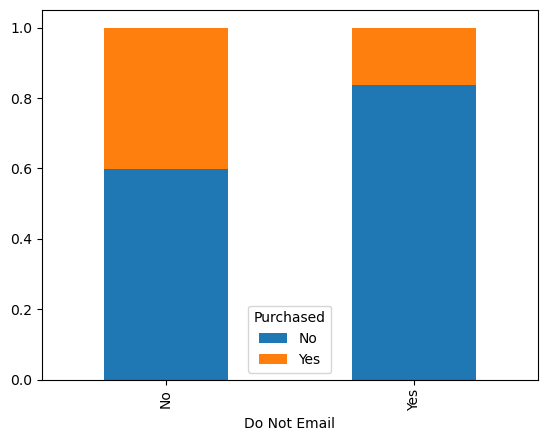

In [31]:
do_not_email.div(do_not_email.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)


<AxesSubplot: xlabel='Do Not Call'>

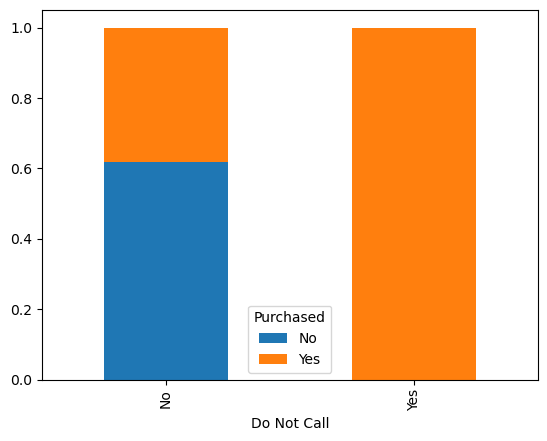

In [32]:
do_not_call.div(do_not_call.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)


<AxesSubplot: xlabel='Origin'>

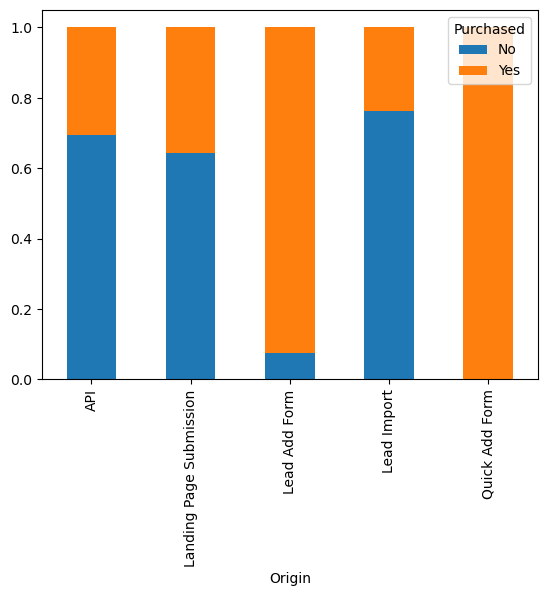

In [33]:
origin.div(origin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

In [34]:
data.head(10)

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,Marketing Management,API
1,2,No,No,No,5.0,674,2.5,Marketing Management,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,Marketing Management,Landing Page Submission
5,6,No,No,No,0.0,0,0.0,Marketing Management,API
6,7,Yes,No,No,2.0,1640,2.0,Supply Chain Management,Landing Page Submission
7,8,No,No,No,0.0,0,0.0,Marketing Management,API
8,9,No,No,No,2.0,71,2.0,IT Projects Management,Landing Page Submission
9,10,No,No,No,4.0,58,4.0,Finance Management,API


In [35]:
data.tail(10)

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
9228,9229,Yes,No,No,4.0,1944,2.00,Finance Management,Landing Page Submission
9230,9231,No,No,No,2.0,870,2.00,Human Resource Management,Landing Page Submission
9231,9232,Yes,No,No,8.0,1016,4.00,"Banking, Investment And Insurance",Landing Page Submission
9232,9233,No,No,No,2.0,1770,2.00,Human Resource Management,Landing Page Submission
9234,9235,Yes,No,No,5.0,210,2.50,Business Administration,Landing Page Submission
9235,9236,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission
9239,9240,Yes,No,No,6.0,1279,3.00,Supply Chain Management,Landing Page Submission


In [36]:
data.columns

Index(['ID', 'Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin'],
      dtype='object')

In [37]:
data.shape

(8887, 9)

In [38]:
data = pd.get_dummies(data, drop_first=True)

In [39]:
data.shape

(8887, 28)

In [40]:
data.columns

Index(['ID', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Purchased_Yes', 'Do Not Email_Yes',
       'Do Not Call_Yes', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Origin_Landing Page Submission',
       'Origin_Lead Add Form', 'Origin_Lead Import'

In [41]:
X = data[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Do Not Email_Yes',
       'Do Not Call_Yes', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Origin_Landing Page Submission',
       'Origin_Lead Add Form', 'Origin_Lead Import', 'Origin_Quick Add Form']]
X.shape

(8887, 26)

In [42]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
y = data['Purchased_Yes']
y.shape

(8887,)

In [44]:
X.shape, y.shape

((8887, 26), (8887,))

In [45]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Purchased_Yes, dtype: uint8

# ***Data Modelling***

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
x_train.shape, x_test.shape

((6220, 26), (2667, 26))

In [48]:
y_train.shape, y_test.shape

((6220,), (2667,))

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred_test = model1.predict(x_test)
print(f"Acuraccy score is :{accuracy_score(y_test, pred_test)}")

Acuraccy score is :0.770153730783652


The acuraccy for logistic regression we are getting is 77%

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
paramgrid = {'max_iter': list(range(1,20,2)), 'C': list(range(1,20,1))}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=1), paramgrid)
grid_search_lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19],
                         'max_iter': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [52]:
print(grid_search_lr.best_estimator_)
print(grid_search_lr.best_params_)

LogisticRegression(C=1, max_iter=19, random_state=1)
{'C': 1, 'max_iter': 19}


In [53]:
model1_ht = LogisticRegression(C=1, max_iter=19, random_state=1)
model1_ht.fit(x_train, y_train)
pred_test = model1_ht.predict(x_test)
print(f"Acuraccy score is :{accuracy_score(y_test, pred_test)}")

Acuraccy score is :0.6835395575553056


After hyper parameter tuning we are getting 68% of acuraccy from logistic regression model.

In [55]:
pred_test = model1_ht.predict(x_test)
print(f"Acuraccy after hyper paratmeter tuning for logistic is:{accuracy_score(y_test, pred_test)}")

Acuraccy after hyper paratmeter tuning for logistic is:0.6835395575553056


In [56]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
model2 = tree.DecisionTreeClassifier(random_state=1)
model2.fit(x_train, y_train)
pred_test = model2.predict(x_test)
print(f"Acuraccy score is :{accuracy_score(y_test, pred_test)}")

Acuraccy score is :0.7225346831646045


Hence we have used Descision tree classifier and we are getting 72% acuraccy.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model3 = RandomForestClassifier(random_state=1)
model3.fit(x_train, y_train)
pred_test = model3.predict(x_test)
print(f"Acuraccy score is :{accuracy_score(y_test, pred_test)}")

Acuraccy score is :0.7585301837270341


Almost 76% of acuraccy is obtained by the Random Forest model.

In [58]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)
grid_search_rf.fit(x_train, y_train)

"GridSearchCV(error_score='raise', estimator=RandomForestClassifier(bootstrap = True, criterion = 'gini', \n                                                                   max_features = 'auto', min_impurity_decrease=0.0, min_samples_leaf=1,\n                                                                  min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators= 10,\n                                                                  n_jobs=1, oob_score = False, random_state=1, verbose = 0, warm_start = False),\n            n_jobs=1, param_grid={'max_depth': [1,3,5,7,9,11,13,15,17,19],'n_estimators': [1,21,41,61,81,101,121,141,161,181]},\n            pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', verbose=0)\n"

In [59]:
print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_params_)

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)
{'max_depth': 7, 'n_estimators': 61}


In [60]:
model3_ht = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=61)
model3_ht.fit(x_train, y_train)
pred_test = model3_ht.predict(x_test)
print(f"Acuraccy score is :{accuracy_score(y_test, pred_test)}")

Acuraccy score is :0.7979002624671916


After hyper parameter tuning to the Random forest model we are getting 80% acuraccy. So we can conclude that the above random forest model performs better than other models on our datasset.